In [13]:

import torch
import os
import random
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset

import librosa
import librosa.display
#import numba.decorators
import numpy as np
import matplotlib.pyplot as plt
#from numba.decorators import jit as optional_jit


#from google.colab import auth
#auth.authenticate_user()

#from google.colab import drive
#drive.mount('/content/gdrive')


PATH = 'C://Projects//keras_talk//keras//intern//dataset//'
#PATH = '/content/gdrive/My Drive/dataset/'


BATCH_SIZE = 40




C:\Users\DongHwi\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\DongHwi\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


#
###### y_data 
class를

0 ~ 180 까지는 20으로 나눠주어서 [0~9]로

-1(음성이 없는경우)는 10으로 구성하였습니다.

In [2]:
def Y_DATA(y_data):
    for idx in range(y_data.shape[0]):
        y = y_data[idx]
        if y < 0:  y_data[idx] = 10
        else:      y_data[idx] = (y//20)
    return y_data

 
 #
 
 mat2npy.py 에서

scipy.io.loadmat 함수를 이용해 .npy 로 저장했습니다.

.mat ==> .npy 

In [3]:

dataset_dict = { 0 : 'S_left',        1 : 'S_left_phase',
                 2 : 'S_right',       3 : 'S_right_phase',
                 4 : 'clean_left',    5 : 'clean_left_phase',
                 6 : 'clean_right',   7 : 'clean_right_phase',
                 8 : 'idx_drone_end', 9 : 'idx_voice_end',
                10 : 'idx_voice_start'}



In [4]:
""" mat2npy.np"""

# 
# import numpy as np
# from scipy.io import loadmat

# PATH = 'C://Users//DongHwi//Desktop//intern//'
# file = 'dataset_1.mat'


#dataset_dict = { 0 : 'S_left',        1 : 'S_left_phase',
#                 2 : 'S_right',       3 : 'S_right_phase',
#                 4 : 'clean_left',    5 : 'clean_left_phase',
#                 6 : 'clean_right',   7 : 'clean_right_phase',
#                 8 : 'idx_drone_end', 9 : 'idx_voice_end',
#                10 : 'idx_voice_start'}


# '''x_data'''
# for n in range(len(dataset_dict)):
#     mat_data_name = dataset_dict[n]
#     npy_from_mat  = mat_file[ mat_data_name ]

#     np.save( PATH + mat_data_name + '.npy', npy_from_mat )
#     print('saved as '+mat_data_name+'.npy')


# '''y_data'''
# y_data = loadmat( PATH+'angle.mat' )
# np.save( PATH+'angle.npy', y_data['phi'][:1000] )
# print('done.')
# 

' mat2npy.np'

#
###### data normalization


numpy_dict[0] ==> S_left.npy

numpy_dict[1] ==> S_left_phase.npy

numpy_dict[2] ==> S_right.npy

numpy_dict[3] ==> S_right_phase.npy


In [5]:
y_data =  np.load(PATH + 'angle.npy') 

x_data_list = [0,2,1,3]
numpy_dict = dict()

for n in x_data_list:
    numpy_name    = dataset_dict[n]
    numpy_dict[n] = np.load( PATH + numpy_name + '.npy' )


# .shape = (257, 382, 1000)
S_L_mag = numpy_dict[0]
S_L_phase = numpy_dict[1]
S_R_mag = numpy_dict[2]
S_R_phase = numpy_dict[3]



In [6]:
print(S_L_mag.shape)

(257, 382, 1000)


#

###### spectrogram

20*log( |x| + epsilon )  [dB]

[20]


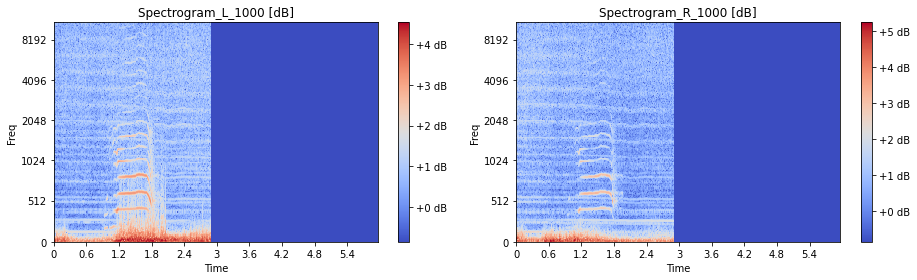

In [8]:

i = 1000

Freq = 16000


x_data_L = 20*np.log10( np.abs(S_L_mag[:,:,i-1]) + np.finfo(np.float16).eps )
x_data_R = 20*np.log10( np.abs(S_R_mag[:,:,i-1]) + np.finfo(np.float16).eps )
print(y_data[i-1])
x_mean3 = x_data_L.mean()
x_stdv3 = x_data_L.std()
x_mean4 = x_data_R.mean()
x_stdv4 = x_data_R.std()
x_data_L = ( (x_data_L - x_mean3 ) / x_stdv3)
x_data_R = ( (x_data_R - x_mean4 ) / x_stdv4)

plt.figure(figsize=(13,4))

plt.subplot(121)
librosa.display.specshow(x_data_L, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_L_'+str(i)+ ' [dB]')

plt.subplot(122)
librosa.display.specshow(x_data_R, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_R_'+str(i)+ ' [dB]')
plt.tight_layout()
plt.show()

#
###### spectrogram

librosa.amplitude_to_db

[20]


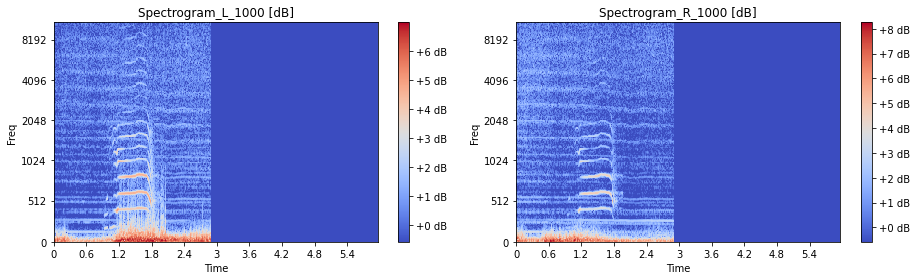

In [9]:

i = 1000
Freq = 16000


x_data_L_2 = librosa.amplitude_to_db(S_L_mag[:,:,i-1])
x_data_R_2 = librosa.amplitude_to_db(S_R_mag[:,:,i-1])


x_mean1 = x_data_L_2.mean()
x_stdv1 = x_data_L_2.std()
x_mean2 = x_data_R_2.mean()
x_stdv2 = x_data_R_2.std()
x_data_L_2 = ( (x_data_L_2 - x_mean1 ) / x_stdv1)
x_data_R_2 = ( (x_data_R_2 - x_mean2 ) / x_stdv2)

print(y_data[i-1])


plt.figure(figsize=(13,4))

plt.subplot(121)
librosa.display.specshow(x_data_L_2, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_L_'+str(i)+ ' [dB]')

plt.subplot(122)
librosa.display.specshow(x_data_R_2, sr=Freq, hop_length=250, x_axis='time', y_axis='mel')
plt.xlabel('Time')
plt.ylabel('Freq')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram_R_'+str(i)+ ' [dB]')
plt.tight_layout()
plt.show()

# 

x_data 전처리

    -magnitude log 변환

    -정규화

In [10]:


x_data = []
'''    x_data,       y_data '''
'''(1000,4,257,382), (1000,)'''


for idx in range(1000):
    #
    x_element = []


    """ Mag """
    x_L = S_L_mag[:,:,idx]
    x_R = S_R_mag[:,:,idx]

    """log scale [dB]"""
    x_L = 20*np.log10( np.abs(x_L) + np.finfo(np.float16).eps )
    x_R = 20*np.log10( np.abs(x_R) + np.finfo(np.float16).eps )
    #x_L = librosa.amplitude_to_db(x_L)
    #x_R = librosa.amplitude_to_db(x_R)
    


    """phase"""
    x_L_phase = S_L_phase[:,:,idx]
    x_R_phase = S_R_phase[:,:,idx]



 #   """even mode, odd mode""" 
 #   x_even = (x_L + x_R)/2
 #   x_odd  = (x_L - x_R)/2
 #   x_element.append(x_even)
 #   x_element.append(x_odd)
    
    
    #x_element.shape ==> (4, 258, 382)
    x_element.append(x_L)
    x_element.append(x_R)
    x_element.append(x_L_phase)
    x_element.append(x_R_phase)



    """normalization"""
    for k in range(len(x_element)):
        x_mean = x_element[k].mean()
        x_stdv = x_element[k].std()
        x_element[k] = ( (x_element[k] - x_mean ) / x_stdv)
    


    x_data.append( np.asarray(x_element) )


x_data = np.asarray(x_data)
y_data = Y_DATA( y_data )

print('done...')


done...


#

training set   : 800

validation set : 200

In [11]:

train_size = 800
valid_size = 200


x_data = torch.from_numpy( x_data ).float().to('cpu')
y_data = torch.from_numpy( y_data ).long().to('cpu')

full_dataset = TensorDataset( x_data, y_data )

# 8:2 비율로 랜덤
train_dataset, valid_dataset = torch.utils.data.random_split( full_dataset, [train_size, valid_size])
train_dataset = DataLoader( dataset=train_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last=True)
valid_dataset = DataLoader( dataset=valid_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last=True)


In [10]:
import re
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
from torch import Tensor




In [11]:
class _DenseLayer(nn.Module):
    def __init__(self, num_input_features, growth_rate, bn_size, drop_rate, memory_efficient=False):
        super(_DenseLayer, self).__init__()
        
        self.add_module('norm1', nn.BatchNorm2d(num_input_features)),
        self.add_module('relu1', nn.ReLU(inplace=True)),
        self.add_module('conv1', nn.Conv2d(num_input_features, bn_size * growth_rate,
                                           kernel_size=1, stride=1,bias=False)),
        
        self.add_module('norm2', nn.BatchNorm2d(bn_size * growth_rate)),
        self.add_module('relu2', nn.ReLU(inplace=True)),
        self.add_module('conv2', nn.Conv2d(bn_size * growth_rate, growth_rate,
                                           kernel_size=3, stride=1, padding=1,
                                           bias=False)),
        
        self.drop_rate = float(drop_rate)
        self.memory_efficient = memory_efficient

    def bn_function(self, inputs):
        # type: (List[Tensor]) -> Tensor
        concated_features = torch.cat(inputs, 1)
        bottleneck_output = self.conv1(self.relu1(self.norm1(concated_features)))  # noqa: T484
        
        return bottleneck_output


    def forward(self, input):  # noqa: F811
        if isinstance(input, Tensor):
            prev_features = [input]
        else:
            prev_features = input


        bottleneck_output = self.bn_function(prev_features)
        new_features = self.conv2(self.relu2(self.norm2(bottleneck_output)))
        
        if self.drop_rate > 0:
            new_features = F.dropout(new_features, p=self.drop_rate,
                                     training=self.training)
        
        return new_features




class _DenseBlock(nn.ModuleDict):
    _version = 2

    def __init__(self, num_layers, num_input_features, bn_size, growth_rate, drop_rate, memory_efficient=False):
        super(_DenseBlock, self).__init__()
        for i in range(num_layers):
            layer = _DenseLayer(
                num_input_features + i * growth_rate,
                growth_rate=growth_rate,
                bn_size=bn_size,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient,
            )
            self.add_module('denselayer%d' % (i + 1), layer)

    def forward(self, init_features):
        features = [init_features]
        for name, layer in self.items():
            new_features = layer(features)
            features.append(new_features)
        return torch.cat(features, 1)





class _Transition(nn.Sequential):
    def __init__(self, num_input_features, num_output_features):
        super(_Transition, self).__init__()
        self.add_module('norm', nn.BatchNorm2d(num_input_features))
        self.add_module('relu', nn.ReLU(inplace=True))
        self.add_module('conv', nn.Conv2d(num_input_features,
                                          num_output_features,
                                          kernel_size=1, stride=1, bias=False))
        self.add_module('pool', nn.AvgPool2d(kernel_size=2, stride=2))








class DenseNet(nn.Module):
    '''growth_rate, drop_rate'''
    def __init__(self, growth_rate=20, block_config=(6, 12, 24, 16),
                 num_init_features=128, bn_size=4, drop_rate=0.10,
                 num_classes=11, memory_efficient=False):

        super(DenseNet, self).__init__()

        # First convolution
        self.features = nn.Sequential(OrderedDict([
            ('conv0', nn.Conv2d(4, num_init_features, kernel_size=7, stride=2, padding=3, bias=False)),
            ('norm0', nn.BatchNorm2d(num_init_features)),
            ('relu0', nn.ReLU(inplace=True)),
            ('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
        ]))


        # Each denseblock
        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = _DenseBlock(
                num_layers=num_layers,
                num_input_features=num_features,
                bn_size=bn_size,
                growth_rate=growth_rate,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient
            )
            self.features.add_module('denseblock%d' % (i + 1), block)
            num_features = num_features + num_layers * growth_rate

            if i != len(block_config) - 1:
                trans = _Transition(num_input_features=num_features,
                                    num_output_features=num_features // 2)
                self.features.add_module('transition%d' % (i + 1), trans)
                num_features = num_features // 2

        # Final batch norm
        self.features.add_module('norm5', nn.BatchNorm2d(num_features))

        # Linear layer
        self.classifier = nn.Linear(num_features, num_classes)

        # Official init from torch repo.
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)



    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out






def _densenet(arch, growth_rate, block_config, num_init_features, pretrained, progress, **kwargs):
    return DenseNet(growth_rate, block_config, num_init_features, **kwargs)



def densenet_custom(pretrained=False, progress=True, **kwargs):
    return _densenet('densenet_custom', 20, (5, 5, 3), 32, pretrained, progress, **kwargs)






In [17]:
torch.manual_seed(1)


model = densenet_custom().to('cpu')

criterion = nn.CrossEntropyLoss().to('cpu')
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.00001, weight_decay=0.9)


train_loss = []
train_acc  = []
EPOCHS = 10

model.train()
for epoch in range(EPOCHS):
    
    print('epoch' + str(epoch+1))
    total_loss = 0.0
    total_acc = 0
    
    for i, (data, label) in enumerate(train_dataset):
        (data, label) = (data.to('cpu'), label.to('cpu'))

        #zero the parameter gradients
        optimizer.zero_grad()
        output = model(data)
        
        # forward + backward = optimize
        loss = F.nll_loss(output, label.reshape(BATCH_SIZE))
        loss.backward()
        optimizer.step()
        
        #
        preds = output.data.max(1)[1]
        corr  = (preds==label.reshape(BATCH_SIZE)).sum().item()
        acc   = corr/BATCH_SIZE*100
        total_loss += loss.item()
        total_acc += corr
        
        #
        train_loss.append(loss.item())
        train_acc.append( acc )
        
        
        print('\tLoss: {:.3f}\tAcc: {:.3f}'.format(loss.item(), acc))
    print('epoch'+str(epoch+1)+'  >> Loss: {:.3f}\tAcc: {:.3f}'.format( total_loss, total_acc/800*100 ))
    print()

epoch1
	Loss: -0.135	Acc: 15.000
	Loss: -0.125	Acc: 7.500
	Loss: -0.143	Acc: 17.500
	Loss: -0.030	Acc: 7.500
	Loss: -0.074	Acc: 10.000
	Loss: -0.057	Acc: 7.500
	Loss: -0.104	Acc: 7.500
	Loss: -0.052	Acc: 10.000
	Loss: -0.067	Acc: 5.000
	Loss: 0.008	Acc: 2.500
	Loss: -0.097	Acc: 17.500
	Loss: -0.115	Acc: 5.000
	Loss: -0.087	Acc: 5.000
	Loss: -0.115	Acc: 5.000
	Loss: -0.038	Acc: 7.500
	Loss: -0.101	Acc: 7.500
	Loss: -0.038	Acc: 12.500
	Loss: -0.145	Acc: 15.000
	Loss: -0.124	Acc: 7.500
	Loss: -0.085	Acc: 5.000
epoch1  >> Loss: -1.726	Acc: 8.875
epoch2
	Loss: -0.056	Acc: 12.500
	Loss: -0.110	Acc: 12.500
	Loss: -0.103	Acc: 5.000
	Loss: -0.151	Acc: 7.500
	Loss: -0.090	Acc: 20.000
	Loss: -0.040	Acc: 7.500
	Loss: -0.091	Acc: 10.000
	Loss: -0.095	Acc: 10.000
	Loss: -0.124	Acc: 7.500
	Loss: -0.043	Acc: 7.500
	Loss: -0.071	Acc: 10.000
	Loss: -0.086	Acc: 2.500
	Loss: -0.141	Acc: 17.500
	Loss: -0.038	Acc: 5.000
	Loss: -0.082	Acc: 5.000
	Loss: -0.131	Acc: 10.000
	Loss: -0.066	Acc: 5.000
	Loss: -0.13

In [18]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for data, label in valid_dataset:
        output = model(data)
        preds  = torch.max(output.data, 1)[1]
        total   += len(label)
        
        label = label.reshape(BATCH_SIZE)
        correct += (preds==label).sum().item()
      
    print('Test Accuracy: ', 100.*correct/total)

Test Accuracy:  8.5


In [24]:
from torchsummaryX import summary

model = densenet_custom().eval()
arch  = summary( model, torch.rand(1,4,257,382) )

                                                       Kernel Shape  \
Layer                                                                 
0_features.Conv2d_conv0                               [4, 32, 7, 7]   
1_features.BatchNorm2d_norm0                                   [32]   
2_features.ReLU_relu0                                             -   
3_features.MaxPool2d_pool0                                        -   
4_features.denseblock1.denselayer1.BatchNorm2d_...             [32]   
5_features.denseblock1.denselayer1.ReLU_relu1                     -   
6_features.denseblock1.denselayer1.Conv2d_conv1      [32, 80, 1, 1]   
7_features.denseblock1.denselayer1.BatchNorm2d_...             [80]   
8_features.denseblock1.denselayer1.ReLU_relu2                     -   
9_features.denseblock1.denselayer1.Conv2d_conv2      [80, 20, 3, 3]   
10_features.denseblock1.denselayer2.BatchNorm2d...             [52]   
11_features.denseblock1.denselayer2.ReLU_relu1                    -   
12_fea